In order to run the bellow cells, download Amazon datasets for electronics from https://amazon-reviews-2023.github.io/main.html and place them in the /data folder.

In [2]:
import json
import pandas as pd

In [3]:
with open('../../../data/meta_Electronics.jsonl', 'r') as f:
    first_line = json.loads(f.readline())

Filter Items that have been observed for the first time in year 2022 or later.

In [4]:
first_line

{'main_category': 'All Electronics',
 'title': 'FS-1051 FATSHARK TELEPORTER V3 HEADSET',
 'average_rating': 3.5,
 'rating_number': 6,
 'features': [],
 'description': ['Teleporter V3 The “Teleporter V3” kit sets a new level of value in the FPV world with Fat Shark renowned performance and quality. The fun of FPV is experienced firsthand through the large screen FPV headset with integrated NexwaveRF receiver technology while simultaneously recording onboard HD footage with the included “PilotHD” camera. The “Teleporter V3” kit comes complete with everything you need to step into the cockpit of your FPV vehicle. We’ve included our powerful 250mW 5.8Ghz transmitter, 25 degree FOV headset (largest QVGA display available), the brand new “PilotHD” camera with live AV out and all the cables, antennas and connectors needed.'],
 'price': None,
 'images': [{'thumb': 'https://m.media-amazon.com/images/I/41qrX56lsYL._AC_US40_.jpg',
   'large': 'https://m.media-amazon.com/images/I/41qrX56lsYL._AC_.

Filter Items that have been observed for the first time in year 2022 or later.

In [5]:
def filter_data(data: dict) -> dict:
    filter = False
    if int(data['details']['Date First Available'][-4:]) < 2022:
        filter = True

    return filter

In [ ]:
with open("../../../data/meta_Electronics.jsonl", 'r') as fp:
    with open("../../../data/meta_Electronics_2022_2023.jsonl", 'a', encoding='utf-8') as fp_out:
        with open("../../../data/meta_Electronics_2022_2023_no_date.jsonl", 'a', encoding='utf-8') as fp_out_no_date:
            i = 0
            for line in fp:
                data = json.loads(line.strip())
                try:
                    filter = filter_data(data)
                    if not filter:
                        json.dump(data, fp_out)
                        fp_out.write('\n')
                        fp_out.flush()
                except:
                    json.dump(data, fp_out_no_date)
                    fp_out_no_date.write('\n')
                    fp_out_no_date.flush()
                i += 1
                if i % 10000 == 0:
                    print(f"Processed {i} lines")

Split the items into two categories: "has main category", "does not have main category"

In [7]:
def filter_category(data: dict) -> dict:
    filter = False
    if data['main_category'] == None:
        filter = True

    return filter


In [9]:
with open("../../../data/meta_Electronics_2022_2023.jsonl", 'r') as fp:
    with open("../../../data/meta_Electronics_2022_2023_with_category.jsonl", 'a', encoding='utf-8') as fp_out:
        with open("../../../data/meta_Electronics_2022_2023_no_category.jsonl", 'a', encoding='utf-8') as fp_out_no_category:
            for line in fp:
                data = json.loads(line.strip())
                if not filter_category(data):
                    json.dump(data, fp_out)
                    fp_out.write('\n')
                    fp_out.flush()
                else:
                    json.dump(data, fp_out_no_category)
                    fp_out_no_category.write('\n')
                    fp_out_no_category.flush()


Explore distribution by categories

In [13]:
df = pd.read_json("../../../data/meta_Electronics_2022_2023_with_category.jsonl", lines=True)

In [14]:
df.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,Amazon Home,"Outer Space Planets Stickers(50Pcs),Planetary ...",4.5,50,[PROFESSIONAL STICKER SHOP.There are 50 differ...,"[Features:, - Clear picture and exquisite prin...",3.99,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Watch Before Buying! Huge Waterpro...,Affoto,"[Electronics, Computers & Accessories, Laptop ...","{'Brand': 'Affoto', 'Color': 'Outer Space', 'S...",B0BPLX8B2K,NaN,NaN,NaN
1,Computers,"Gateway 15.6"" FHD Ultra Slim Budget Notebook, ...",4.1,15,"[【Processor】4 Core, 4 Threads, 4MB Cache, up t...","[Processor:, Intel® Pentium® Silver N5030 Proc...",189.99,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'Watch before you order ', 'url': '...",Gateway,"[Electronics, Computers & Accessories, Compute...",{'Standing screen display size': '15.6 Inches'...,B0BYBG1PPD,NaN,NaN,NaN
2,Cell Phones & Accessories,May Chen Compatible with MacBook Pro 16 inch C...,4.5,649,[【 COMPATIBLE WITH 】 Designed to Fits Perfectl...,[May Chen High Quality Plastic Hard Shell Case...,26.99,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'MOSISO Plastic Hard Shell Compati...,May Chen,"[Electronics, Computers & Accessories, Laptop ...","{'Standing screen display size': '16 Inches', ...",B0822SL7JX,NaN,NaN,NaN
3,All Electronics,"LENTION USB C Docking Station, 10 Gbps USB C&U...",4.4,16,[10-in-1 Docking Station - CB-D65 laptop docki...,[],89.99,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'LENTION D65 Upgrade Docking Statio...,LENTION,"[Electronics, Computers & Accessories, Laptop ...",{'Package Dimensions': '9.17 x 4.33 x 1.54 inc...,B0BKS1K986,NaN,NaN,NaN
4,All Electronics,1X (No Bluetooth) Eaglewireless Replacement To...,3.0,4,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Eaglewireless,[],{'Package Dimensions': '5.2 x 2.13 x 0.91 inch...,B09MY246CC,NaN,NaN,NaN


Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='main_category'>

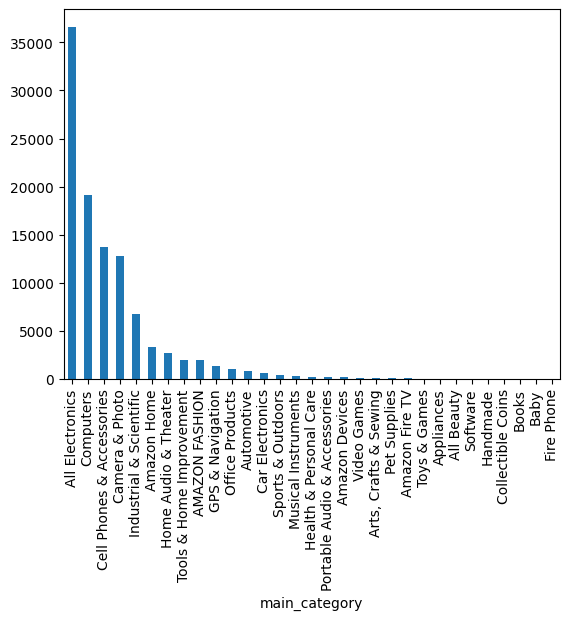

In [15]:
df['main_category'].value_counts().plot(kind='bar')

Filter out items that have at least 100 ratings

In [16]:
df_ratings_100 = df[df['rating_number'] > 100]

In [17]:
len(df)

103993

In [18]:
len(df_ratings_100)

17162

<Axes: xlabel='main_category'>

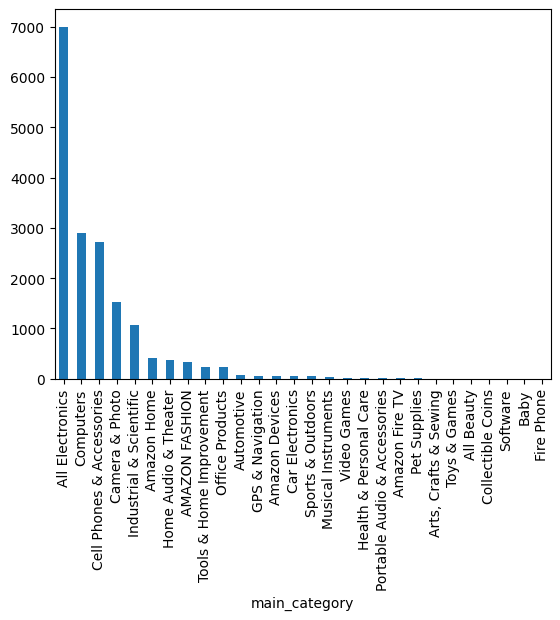

In [19]:
df_ratings_100['main_category'].value_counts().plot(kind='bar')

Explore distribution of ratings

<Axes: ylabel='Frequency'>

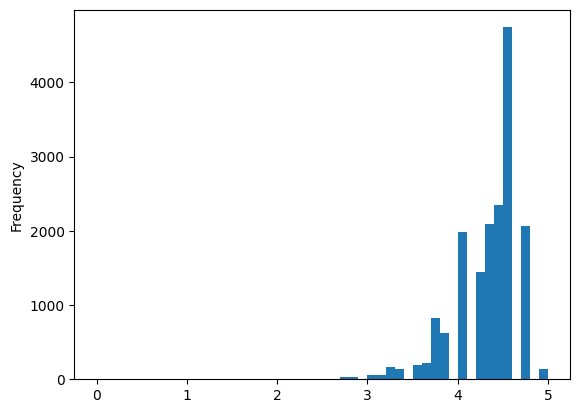

In [20]:
df_ratings_100['average_rating'].plot(kind='hist', bins=50, range=(0, 5))

Sample 1000 datasets

In [21]:
df_sample_1000 = df_ratings_100.sample(n=1000, random_state=20)


<Axes: ylabel='Frequency'>

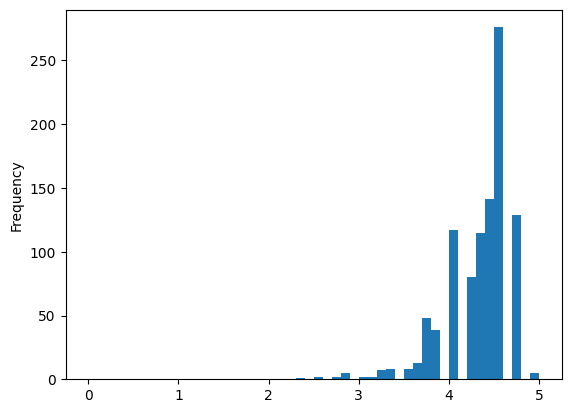

In [22]:
df_sample_1000['average_rating'].plot(kind='hist', bins=50, range=(0, 5))

<Axes: ylabel='Frequency'>

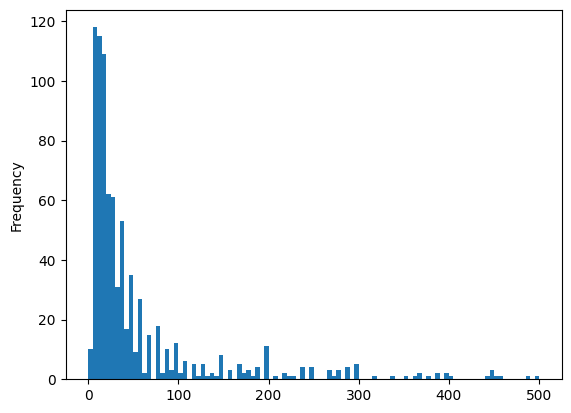

In [23]:
df_sample_1000['price'].plot(kind='hist', bins=100, range=(0, 500))

<Axes: xlabel='main_category'>

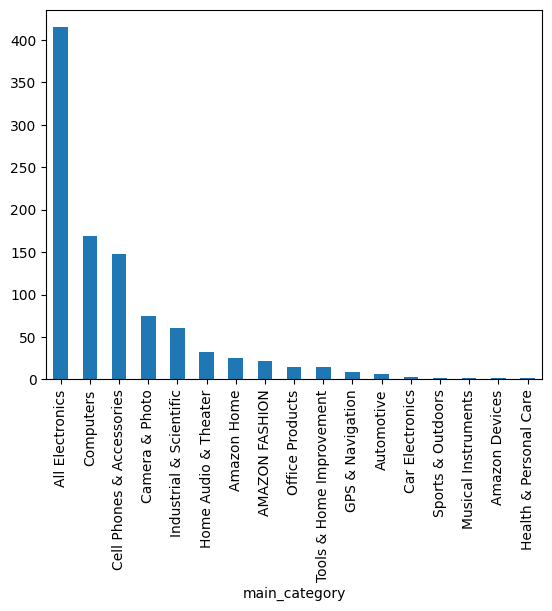

In [24]:
df_sample_1000['main_category'].value_counts().plot(kind='bar')

Write to jsonl category ratings > 100 no with original filter 'main category' - no sampling

In [25]:
df_ratings_100.to_json("../../../data/meta_Electronics_2022_2023_with_category_ratings_100.jsonl", orient='records', lines=True)

Write to Jsonl sampled data category ratings > 100 no

In [26]:
df_sample_1000.to_json("../../../data/meta_Electronics_2022_2023_with_category_ratings_100_sample_1000.jsonl", orient='records', lines=True)

Extract user reviews of the datasets (both sampled and not sampled)

In [29]:
df_ratings_100 = pd.read_json("../../../data/meta_Electronics_2022_2023_with_category_ratings_100.jsonl", lines=True)
df_sample_1000 = pd.read_json("../../../data/meta_Electronics_2022_2023_with_category_ratings_100_sample_1000.jsonl", lines=True)


From the original dataset - Electronics.jsonl, Figure out all records that have parent_asin (so basically include user-reviews also)

In [32]:

with open("../../../data/Electronics.jsonl", 'r') as fp:
    with open("../../../data/Electronics_2022_2023_with_category_ratings_100.jsonl", 'a') as fp_out:
        id_list = set(df_ratings_100['parent_asin'].values)
        i = 0
        for line in fp:
            data = json.loads(line.strip())
            if data['parent_asin'] in id_list:
                json.dump(data, fp_out)
                fp_out.write('\n')
                fp_out.flush()
            i += 1
            if i % 100000 == 0:
                print(f"Processed {i} lines")



Processed 100000 lines
Processed 200000 lines
Processed 300000 lines
Processed 400000 lines
Processed 500000 lines
Processed 600000 lines
Processed 700000 lines
Processed 800000 lines
Processed 900000 lines
Processed 1000000 lines
Processed 1100000 lines
Processed 1200000 lines
Processed 1300000 lines
Processed 1400000 lines
Processed 1500000 lines
Processed 1600000 lines
Processed 1700000 lines
Processed 1800000 lines
Processed 1900000 lines
Processed 2000000 lines
Processed 2100000 lines
Processed 2200000 lines
Processed 2300000 lines
Processed 2400000 lines
Processed 2500000 lines
Processed 2600000 lines
Processed 2700000 lines
Processed 2800000 lines
Processed 2900000 lines
Processed 3000000 lines
Processed 3100000 lines
Processed 3200000 lines
Processed 3300000 lines
Processed 3400000 lines
Processed 3500000 lines
Processed 3600000 lines
Processed 3700000 lines
Processed 3800000 lines
Processed 3900000 lines
Processed 4000000 lines
Processed 4100000 lines
Processed 4200000 lines
P

Now, Let's get the user reviews of sampled data (this is a subset of category with user ratings, no read to write original file)

In [33]:

with open("../../../data/Electronics_2022_2023_with_category_ratings_100.jsonl", 'r') as fp:
    with open("../../../data/Electronics_2022_2023_with_category_ratings_100_sample_1000.jsonl", 'a') as fp_out:
        id_list = set(df_sample_1000['parent_asin'].values)
        i = 0
        for line in fp:
            data = json.loads(line.strip())
            if data['parent_asin'] in id_list:
                json.dump(data, fp_out)
                fp_out.write('\n')
                fp_out.flush()
            i += 1
            if i % 100000 == 0:
                print(f"Processed {i} lines")


Processed 100000 lines
Processed 200000 lines
Processed 300000 lines
Processed 400000 lines
Processed 500000 lines
Processed 600000 lines
Processed 700000 lines
Processed 800000 lines
Processed 900000 lines
Processed 1000000 lines
Processed 1100000 lines
Processed 1200000 lines
Processed 1300000 lines
Processed 1400000 lines
Processed 1500000 lines
Processed 1600000 lines
Processed 1700000 lines
